In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#define the policy
def epsilon_greedy(epsilon, action_values):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(action_values))
    else:
        return np.argmax(action_values)

In [4]:
#define the reward function 
def get_reward(action, true_action_value):
    return np.random.normal(true_action_value[action], 1/2)

In this exercise we are experimenting with two different parameters: 
1. Epislons 
2. The initialization of action values 

In [14]:
def bandit(k, nb_run, steps, init, eps):
  average_rewards = np.zeros(steps)
  optimal_actions = np.zeros(steps)

  for i in range(nb_run): 
    true_action_value = np.random.normal(0, 2, k)
    action_count = np.zeros(k)
    action_values = np.zeros(k) + init
    optimal_action = np.argmax(true_action_value)

    for j in range(steps): 
      if eps == '1/t': 
        eps = 1/steps 
      elif eps == '1/t^2': 
        eps = 1/(steps * steps)
      
      action = epsilon_greedy(eps, action_values)
      reward = get_reward(action, true_action_value)
      
      action_count[action] += 1 
      action_values[action] += (reward - action_values[action]) / action_count[action]

      average_rewards[j] += reward/ nb_run 

      if action == optimal_action: 
        optimal_actions[j] += 1/nb_run

  fig, axs = plt.subplots(1, 2, figsize=(16, 6))
  axs[0].plot(range(steps), average_rewards, label=f"ε={eps}, I={init}")
  axs[0].set_title('Average Reward vs. Number of Steps')
  axs[0].set_xlabel('Number of Steps')
  axs[0].set_ylabel('Average Reward')
  axs[0].legend()

  axs[1].plot(range(steps), optimal_actions, label=f"ε={eps}, I={init}")
  axs[1].set_title('% Optimal Action vs. Number of Steps')
  axs[1].set_xlabel('Number of Steps')
  axs[1].set_ylabel('% Optimal Action')
  axs[1].legend()

  plt.show()


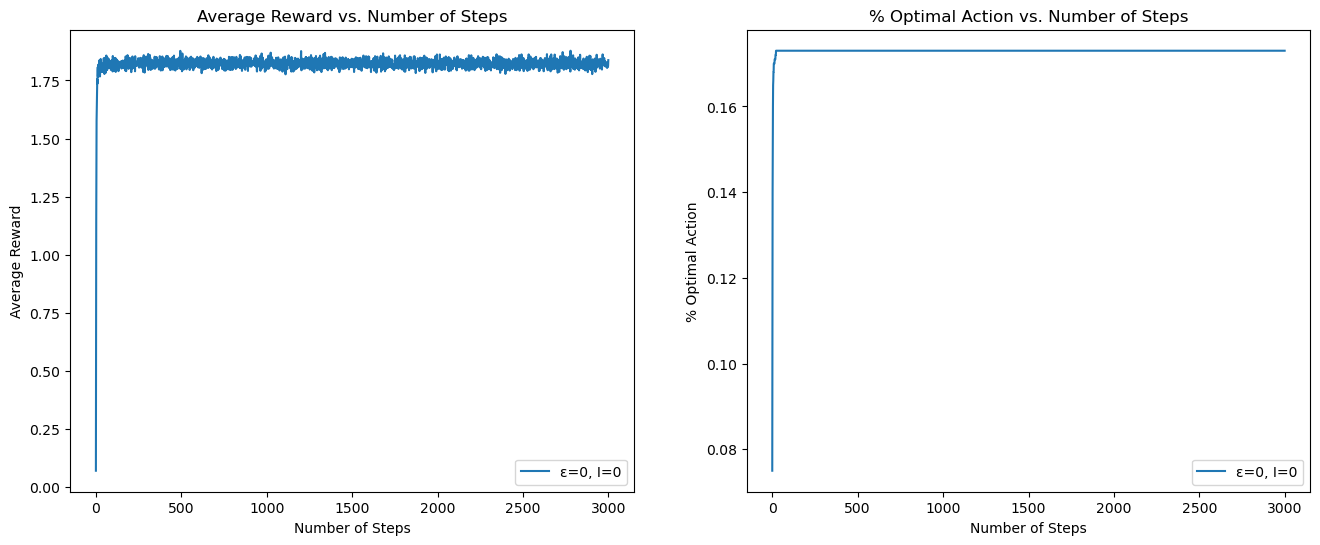

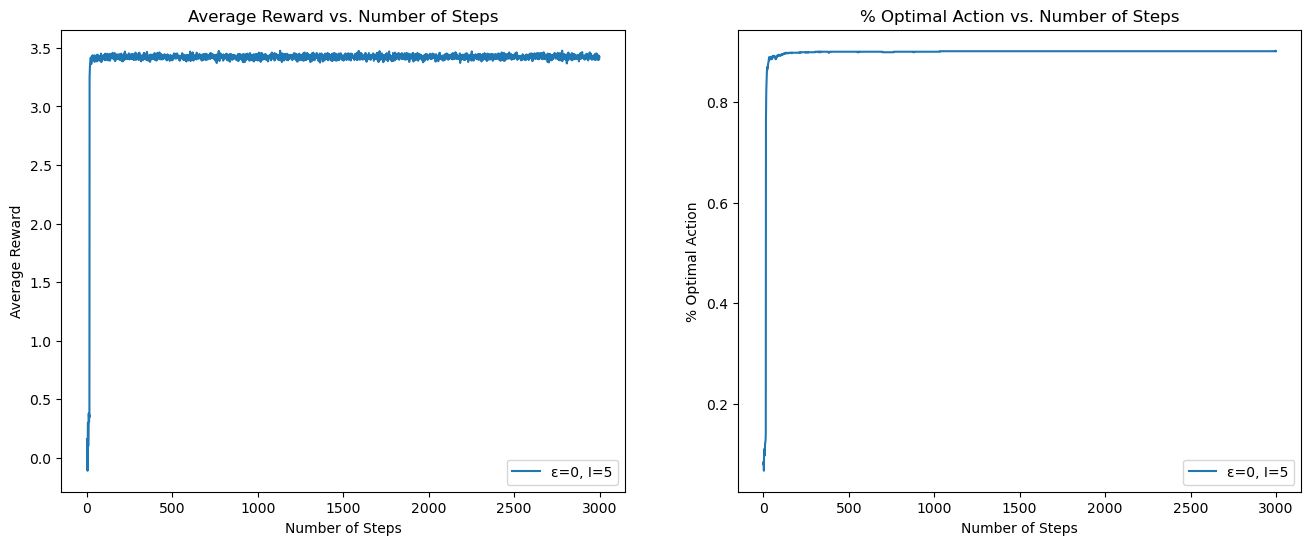

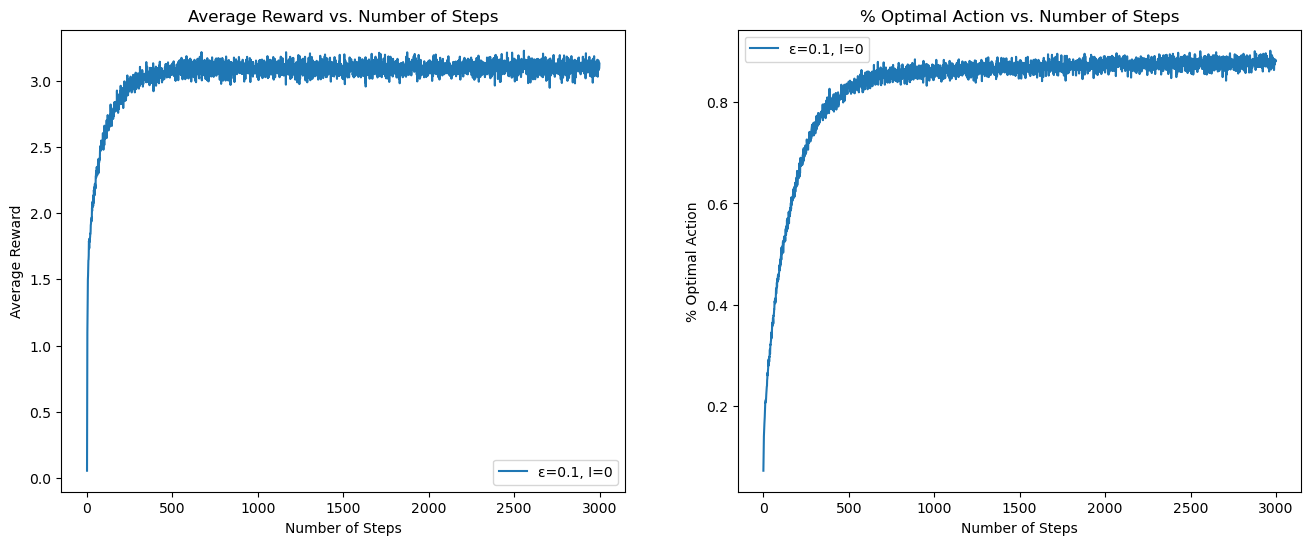

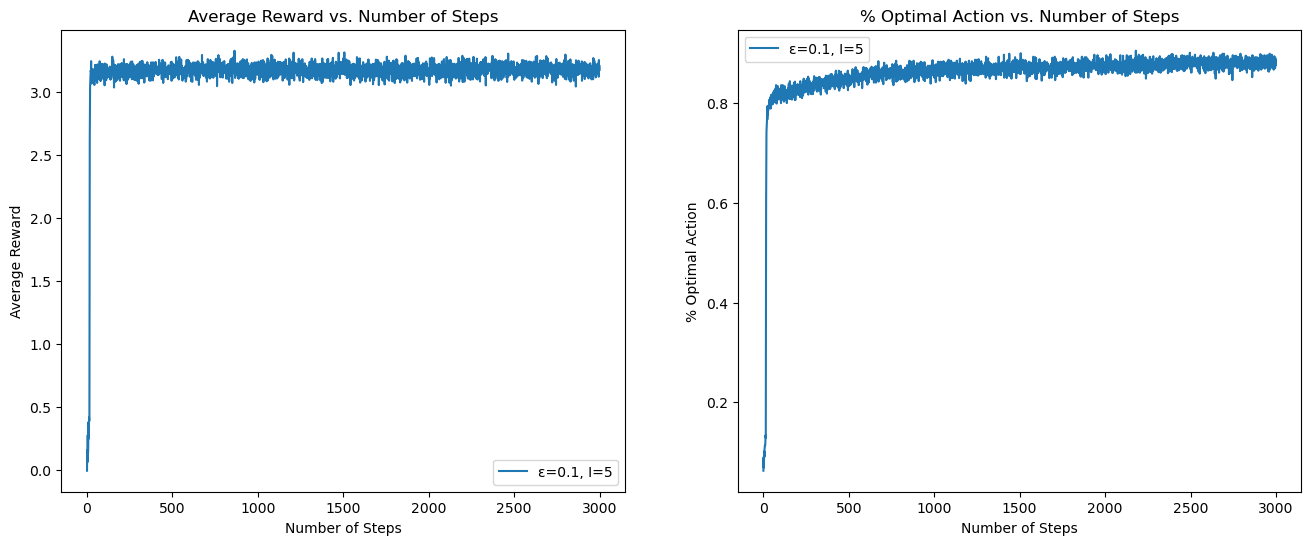

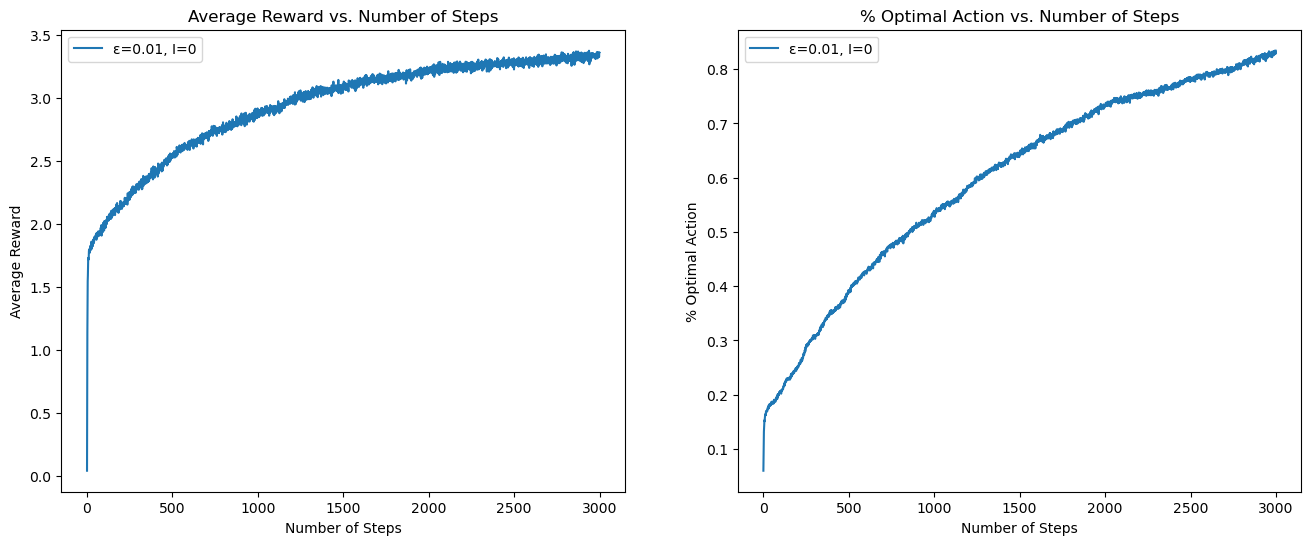

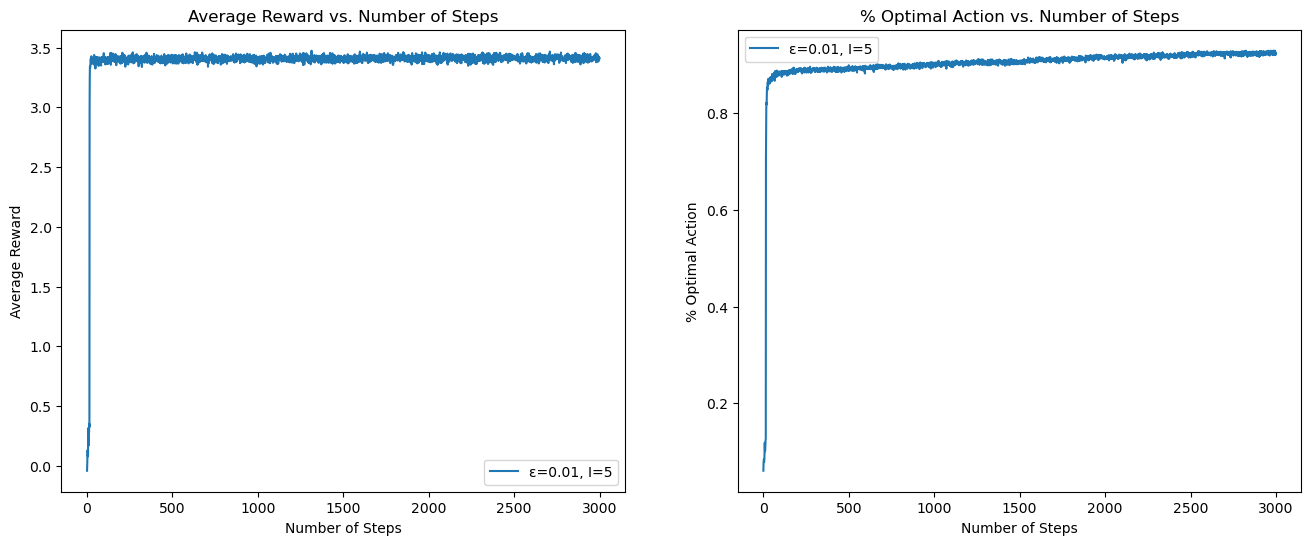

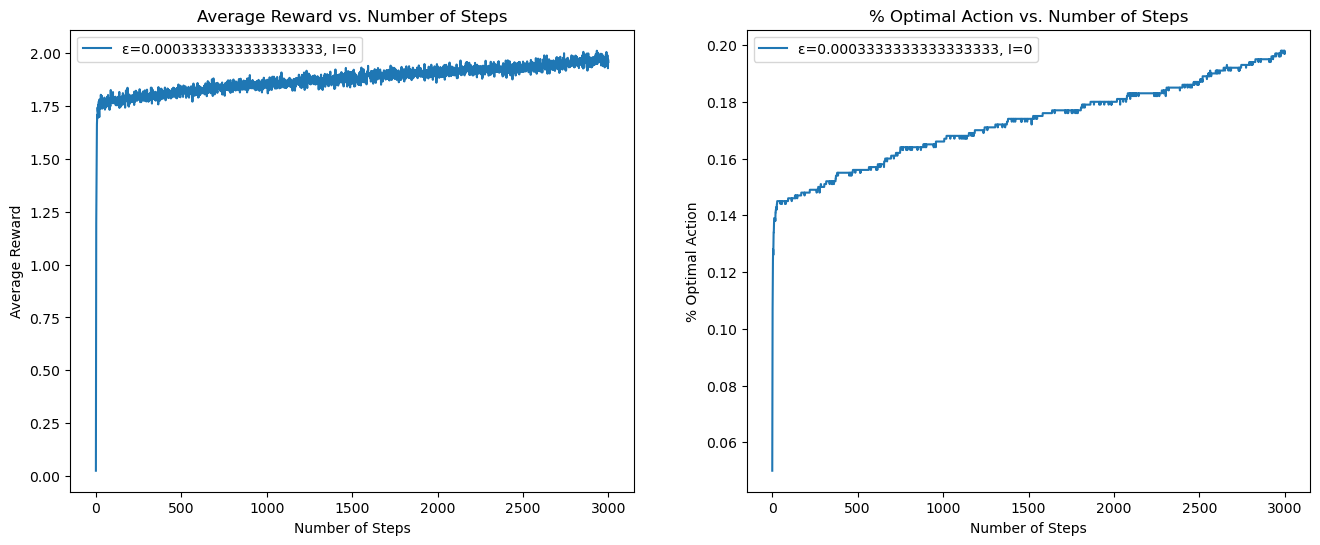

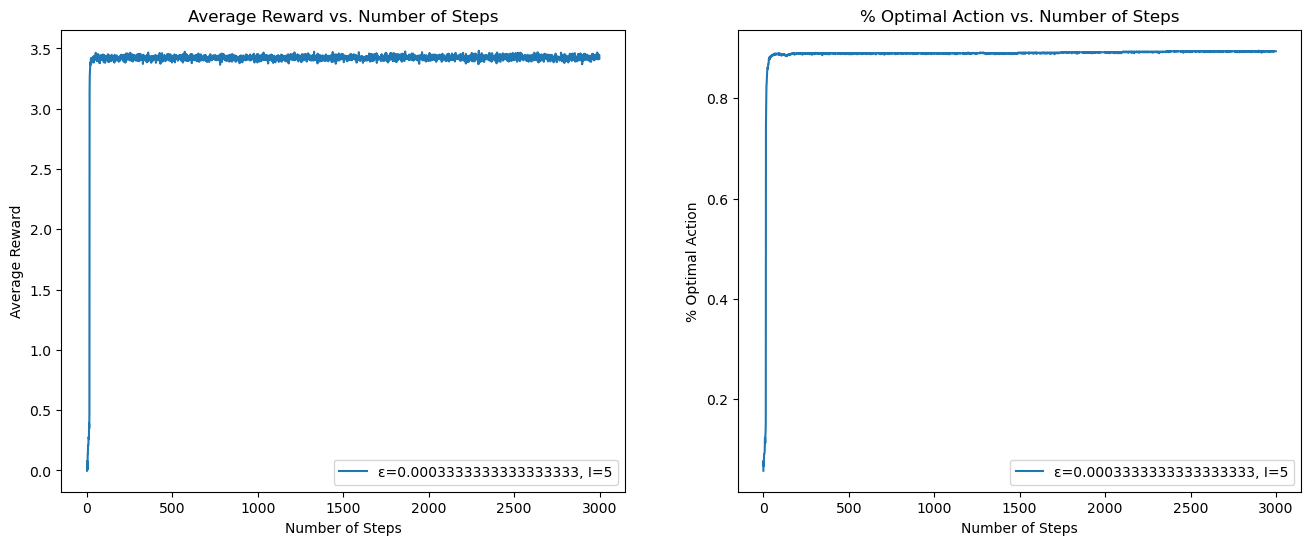

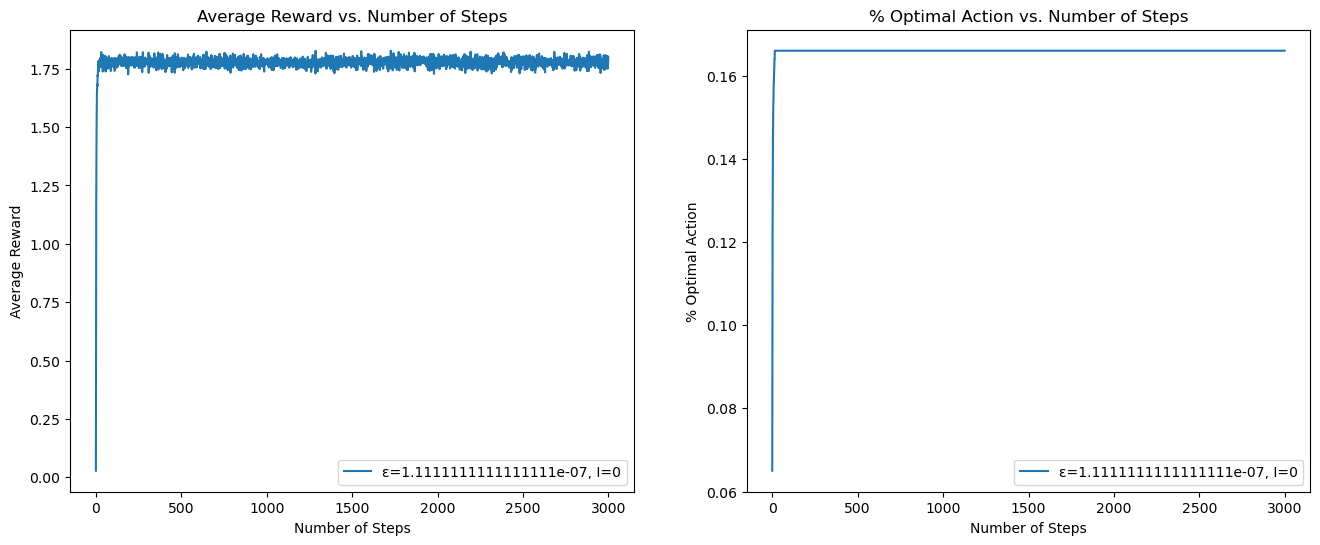

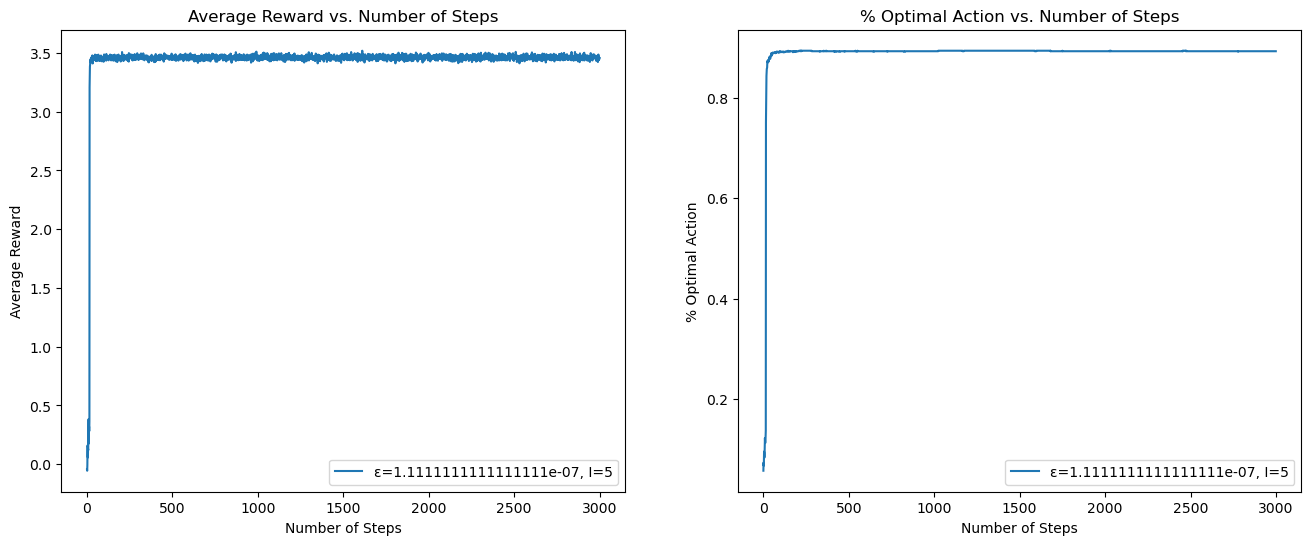

In [15]:
k = 15 
nbr_steps = 3000 
nbr_runs = 1000 
inits = [0, 5]
epsilons = [0, 0.1, 0.01, '1/t', '1/t^2']

for epsilon in epsilons: 
    for init in inits: 
        bandit(k, nbr_runs, nbr_steps, init, epsilon)



Interpretation of the results

- Optimistic initialization reaches the optimal action quickly and achieves the highest average reward in a short time in all cases. 

- +5 is wildly optimistic compared to N(0,2).
- optimism encourages action-value methods to explore.
- Whichever actions are initially selected, the reward is less than the starting estimates; the agent switches to other actions, being disappointed with the rewards it is receiving.
- It's quite effective on stationary problems, but it not well suited to nonstationary problems
- Policy with ε=0.01 performs best in the long run, because this policy will select the optimal action 10 times more frequently than the policy with ε=0.1